<a href="https://colab.research.google.com/github/AdnachielBismarck/AdnachielBismarck/blob/main/Time_Series_Intro_ES_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Time Series Forecasting from Statistical to Recent ML Approaches

Topics for this notebook in bold:
- **Introduction to TS**
- Decompose (*Time_Series_FFT.ipynb*)
 - Gen Synthic
 - Decompose FFT
- **Naive approaches**
- **Statistical (*Time_Series_ES_ARIMA.ipynb*)**
 - **Smoothing techniques (MA, ES**
 - **ARIMA**
 - State Space (*Time_Series_StateSpace.ipynb*)
- ML (*Time_Series_ML-LR_XGBoost.ipynb*)
  - Linear Regression
  - Decision Tree (XGBoost)
- DL (*Time_Series_DL_LSTM_CNN.ipynb*)
 - LSTM, CNN + LSTM
 - TCN (*Time_Series_DL_TCN_LSTNet.ipynb*)
 - LSTNet
 - TFT (*Time_Series_DL_TFT_N-BEATS.ipynb*)
 - N-BEATS
- Commercial: (*Time_Series_Commercial.ipynb*)
 - Facebook Prophet
 - Amazon DeepAR


## Introduction

1. What is Time Series?
1. Example dataset
1. Components of Time Series
1. Forecasting Process: split data, metrics

**What is time series?**

Time series (TS) is a sequence of data that has some order in a set interval like time. It may not have be temporal, as long the data some ordering such as DNA sequences.

**Time Series Analysis vs. Forecasting**

 - Analysis is interested in anlyzing and understanding of the time series to describe the pattern or its seasonality.
 - Forecasting is to predict the future value.

**Tasks involved in TS**
- EDA (Exploritory Data analysis): seasonality, nature of temporial process
- Prediction/Forecasting future values
- Classification type of TS
- Anomaly Detection

**Types of TS: Univariate vs. multivariate**
- univariate: time series with a single observation per time increments.
- multivariate: series has more than one time-dependent variables that capture the dynamic of multiple time series.



### Dataset
- Air passengers: number of air passenger per month over 12 years (1949-1960) https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv
- Sunspot: monthly count of the number of observed sunspots for just over 230 years (1749-1983)
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv
- Shampoo Sales: monthly sales of shampoo over a 3 year period (https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv)
- Milk production: avg monthly milk production (in lbs) of cows from Jan/1962 to Dec/1975. (https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv)


#### Multivariate Dataset
- Traffic : A collection of 48 months (2015-2016) hourly data
from the California Department of Transportation. The data
describes the road occupancy rates (between 0 and 1) measured by different sensors on San Francisco Bay area freeways.
- Solar-Energy: the solar power production records in the
year of 2006, which is sampled every 10 minutes from 137
PV plants in Alabama State.
- Electricity: The electricity consumption in kWh was recorded every 15 minutes from 2012 to 2014
- Exchange-Rate: the collection of the daily exchange rates of eight foreign countries including Australia, British, Canada from 1990 to 2016.

(https://github.com/laiguokun/multivariate-time-series-data)

#### Kaggle Tourism
- Part one requires competitors to predict 518 tourism-related time series. It contains 518 yearly time series. (https://www.kaggle.com/c/tourism1)
- Part two requires competitors to predict 793 tourism-related time series. It contains 793 time series. The first 366 columns contain monthly time series. The next 427 time series contain quarterly time series.  (https://www.kaggle.com/c/tourism2)

#### Makridakis Competitions: M3, M4
- M3: A total of 3003 time series was used.
- M4: 100,000 real-life series
https://mofc.unic.ac.cy/the-dataset/, https://github.com/Mcompetitions/M4-methods/tree/master/Dataset

In [ ]:
# Loading Air Passenger Data

#Download data locally
!curl -O https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('AirPassengers.csv')
df.head(5)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1748  100  1748    0     0   6854      0 --:--:-- --:--:-- --:--:--  6854


,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


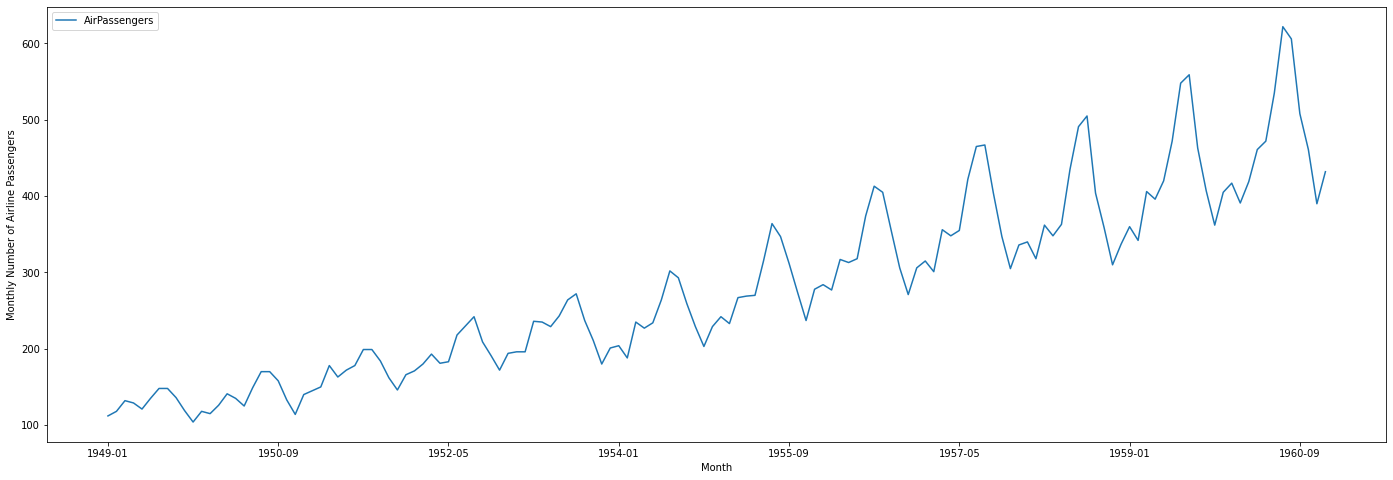

In [ ]:
ax = df.set_index('Month').plot(figsize=(24, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Month')
plt.show()

### Components of Time Series
**Classicla Decomposition**
A basic model for representing a time series:

$y_t = \mu_t + \gamma_t + \varepsilon_t$

where
 - $y_t$ = observation,
 - $\mu_t$ = slowly changing component (trend),
 - $\gamma_t$ = periodic component (seasonality),
 - $\varepsilon_t$ = irregular component (noise).

Time series consists of:
 0. Level: local mean of the series
 1. Trend: estimate of the change between successive time points
 2. Seasonality: the deviation from the local mean due to seasonality
 3. Noise: residual components or random variation

$y_t = level + trend + seasonality + noise$

Ref:
- (State Space Time Series Analysis,
Siem Jan Koopman https://personal.vu.nl/s.j.koopman/documents/2011TSEweek1.pdf)*
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/



In [ ]:
# format data for time series
data = df
data.dtypes #Month object
data['Month'] = pd.DatetimeIndex(data['Month'])
df.dtypes   #Month datetime64[ns]

data.index  #RangeIndex(start=0, stop=144, step=1)
data = data.set_index('Month')
#data.index  #DatetimeIndex([...dtype='datetime64[ns]', name='Month', length=144, freq=None)

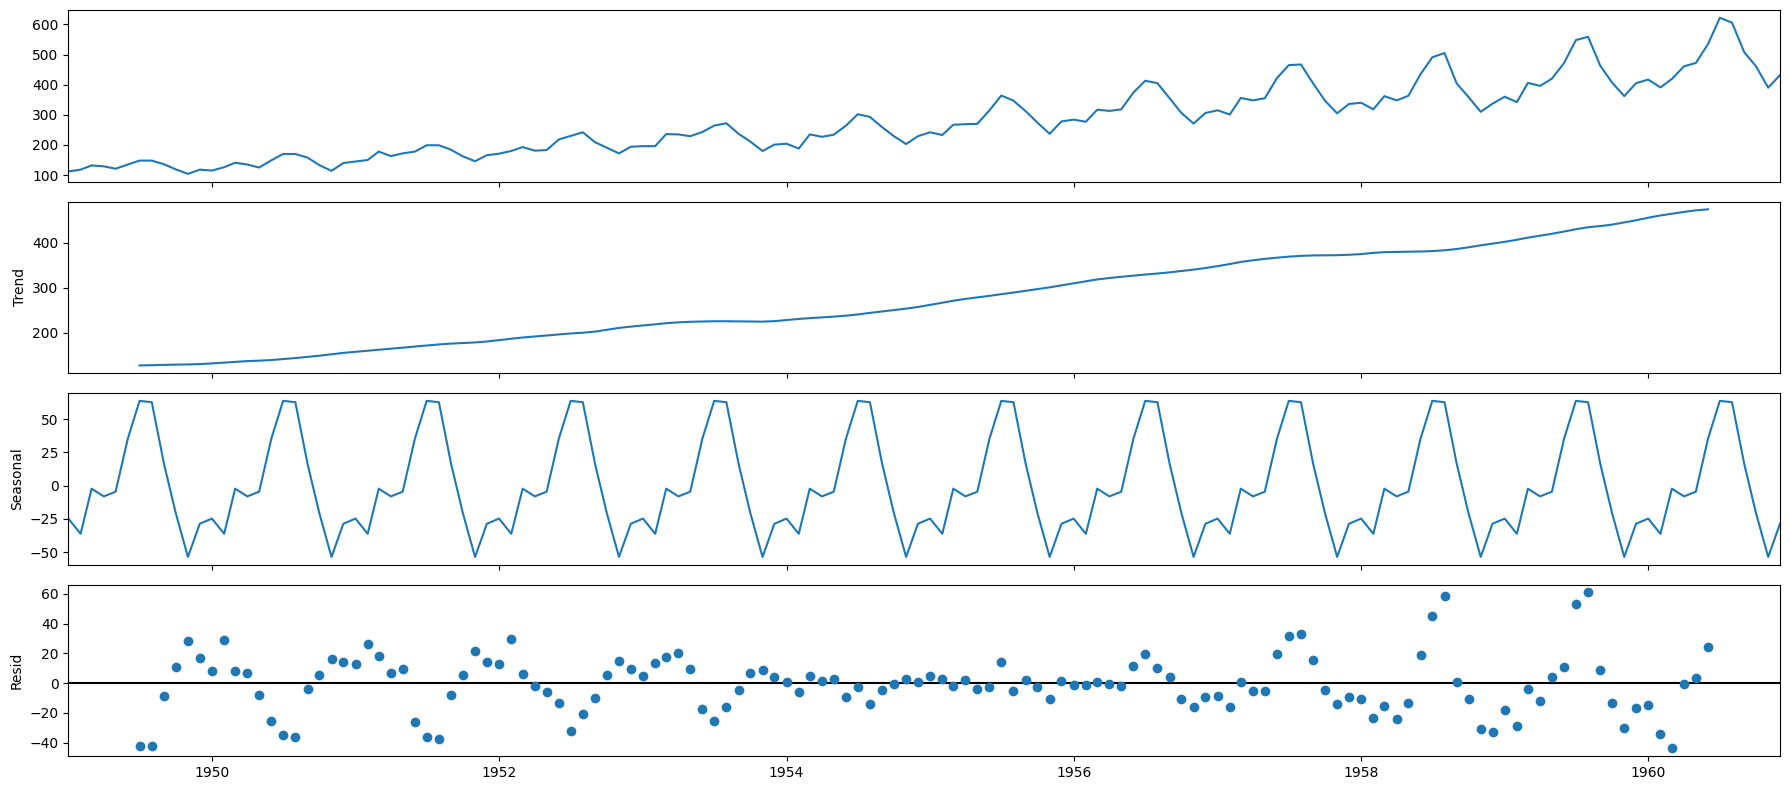

In [4]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data, model='additive') #multiplicative, additive
fig = decomposition.plot()
plt.show()

### Predictions and Metrics


Before we can measure the performance we need to split our data into training and test set before running the experiment.

**Types of prediction**

We want to forecast into the future. There are two approaches of prediction:
 1. One-step ahead prediction
 2. Multi-horizons forecast
> 1. Iterated approaches: utilize one-step-ahead prediction and recursively feeding predictions into future inputs.
> 2. Direct approach: to explicitly generate predictions for multiple time steps at once.

**Univariate vs Multivariate Predictions**
- Some approaches can only model one time series and predict just one set of values.
- Some approaches can predict a single set of value from multivariate dataset.
- Some can predict multiple set of values from multivairate dataset.

**Train and Test Split**

So in our dataset, we want to train on earlier part of the dataset and left out the later part of the dataset to evaluate how well the model does. So we don't want to randomly split the dataset.
- Training set: the first 80% of the data
- Test set: 20% of the latest part of the data, or predict last year or last month.

**Metrics**

To measue how well the algorithm perform, we'll choose one of the metrics below:
- MSE: Mean Squared Error = $\frac{\sum (\hat y - y) ^ 2}{n}$ <br/> `np.square(y_hat - y).mean()`
- RMSE: Root Mean Squared Error = `np.sqrt(MSE)`
- MAE: mean absolute error = $\frac{\sum |\hat y - y|}{n}$ <br/> `abs(y_hat - y).mean()`
- MAD: mean absolute deviation = $\frac{\sum |\hat y_i - \bar y|}{n}$ <br/> `abs(y_hat - y.mean()).mean()`
- MAPE: mean absolute percentage error = $\frac{1}{n} \sum \frac{| y - \hat y |}{y} * 100 $ <br/>`(abs(y - y_hat) / y).mean() * 100`
- sMAPE: Symmetric mean absolute percentage error (scales the error by the average between the forecast and actual) = $\frac{\sum{| y - \hat y |}}{\sum{(y+\hat y)}} * 100$  <br/>
`abs(y - y_hat).sum/(y + y_hat).sum() * 100`
- MASE: Mean Absolute Scaled Error --scales by the average error of the naive null model
= $\frac{1}{n} \sum \frac{| \hat y - y |}{\frac{1}{T+n-m}\sum_j^{T+n} |y_{j} - y_{j-m}|}$
- OWA (overall weighted average) : M4-
specific metric used to rank competition entries (M4 Team, 2018b), where sMAPE and MASE metrics
are normalized such that a seasonally-adjusted naïve forecast obtains OWA = 1.0.

where
> - $y$ : the ground truth observation value
> - $\hat y$ : predicted value
> - $m$ : periodicity,
> - $n$ : forecast horizon

## Naive Approaches
We need a baseline approach so we can compare our fancy algorithms and see how well it does compare to the naive algorithms.




Here are different naive approaches:

- Null model: predict the next value as the previous one (persistence model)
- Seasonal Naive: give a season, the next value is same as previous season value
- Mean: take an average of all previous values as the forecast value
- Random Walk: randomly add noise to prediction of previous value

Ref: https://medium.com/towards-artificial-intelligence/the-universe-of-time-series-forecasting-techniques-a-primer-f73011e18570


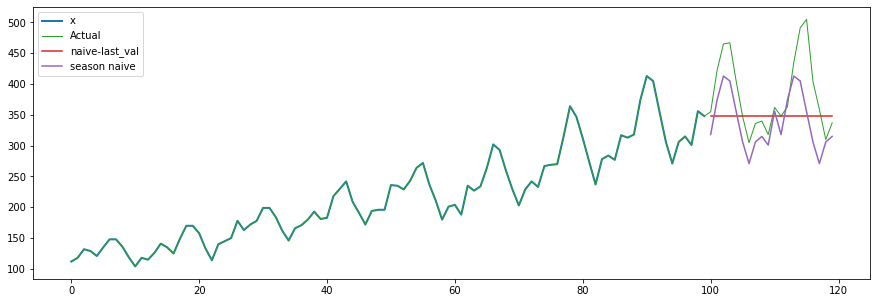

In [ ]:
import numpy as np
import pylab as pl
from numpy import fft

x_orig = df["AirPassengers"][0:120] #144
x = x_orig[0:100]
extrapolation = np.zeros(20)
extrapolation += x[99]
seasonal = np.append(x[88:99],x[88:97])

plt.subplots(figsize=(15,5))
pl.plot(np.arange(0, x.size), x, 'C0', label='x', linewidth=2)
pl.plot(np.arange(0, x_orig.size), x_orig, 'C2', label='Actual', linewidth=1)
pl.plot(np.arange(100, 100+extrapolation.size), extrapolation, 'C3', label='naive-last_val')
pl.plot(np.arange(100, 100+seasonal.size), seasonal, 'C4', label='season naive')
pl.legend()
pl.show()

In [ ]:
# calculate MAE from 100-120
diff = np.abs(x_orig[100:120] - extrapolation[0:20])
#print("type diff:", type(diff)) #type diff: <class 'pandas.core.series.Series'>
naive_mae = diff.mean()
diff = np.abs(x_orig[100:120] - seasonal[0:20])
seasonal_mae = diff.mean()
print("Naive Last Val MAE:", naive_mae)
print("Seaonsal Naive MAE:", seasonal_mae)

Naive Last Val MAE: 49.95
Seaonsal Naive MAE: 45.6


## Smoothing
Smoothing with moving average to exponential smoothing is a way to filter out some of the noises in the data.

### Moving Average

**Simple Moving Average**

$y_t = (x_t + x_{t-1} + x_{t-2} + ... + x_{t-n-1})/n$

where $n$ is number of data point to smooth

```
pandas.DataFrame.mean()
pandas.DataFrame.rolling(n, center=False).mean()
```
Center and Trailing Moving Average

**Weighted Moving Average**

$y_t =  \cfrac{x_t * n + x_{t-1} * (n-1) + x_{t-2} * (n-2) + ... x_{t-n-1}} {\frac{n (n+1)}{2}}$


```
pandas.DataFrame.rolling(n).mean()
pandas.DataFrame.rolling(n, win_types='exponential').mean()
```

**Exponential Weighted Moving Average**

Simple Exponential Smoothing (Holt Linear)

$y_0=x_0$

$y_t = \alpha x_{t} + (1-\alpha)y_{t-1}$

- $\alpha$ : smoothing factor and $ 0<\alpha<1 $ ; lower value means more smoothing
- $y_t$ approximate over $\cfrac{1}{\alpha}$ data points

ie. $\alpha$ = 0.5 ≈ 2 data points, 0.1 ≈ 10 data points, 0.02 ≈ 50 data points

```
pandas.DataFrame.ewm(alpha=0.12).mean()
```
$y_t=(1−α)y_{t−1}+αx_t$



References:
- Andrew Ng - Exponentially Weighted Averages (C2W2L03) https://www.youtube.com/watch?v=lAq96T8FkTw
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
- https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
- https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572

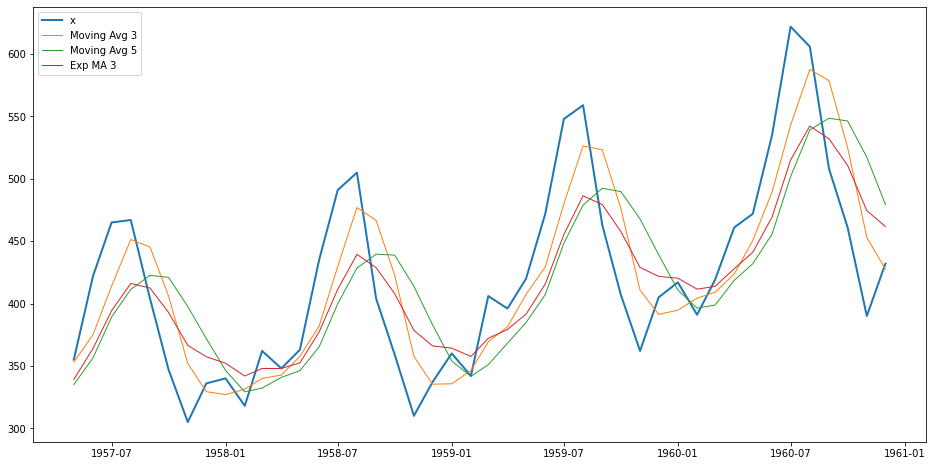

In [ ]:
import pandas as pd
import pylab as pl
data = df
data.dtypes #Month object
data['Month'] = pd.DatetimeIndex(data['Month'])
df.dtypes   #Month datetime64[ns]

data.index  #RangeIndex(start=0, stop=144, step=1)
data = data.set_index('Month')
data.index  #DatetimeIndex([...dtype='datetime64[ns]', name='Month', length=144, freq=None)

ma1 = df.rolling(3).mean() #simple moving avg
#ma2 = df.rolling(10).mean()
ma2 = df.rolling(5).mean()

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
expma = df.ewm(alpha=0.3).mean()

pl.subplots(figsize=(16,8))
pl.plot(data.index[100:], data[100:], 'C0', label='x', linewidth=2)
pl.plot(data.index[100:], ma1[100:], 'C1', label='Moving Avg 3', linewidth=1)
pl.plot(data.index[100:], ma2[100:], 'C2', label='Moving Avg 5', linewidth=1)
pl.plot(data.index[100:], expma[100:], 'C3', label='Exp MA 3', linewidth=1)

pl.legend()
pl.show()

### Exponential Smoothing

**Linear Exponential Smoothing (Holt ES)**
- shown earlier as Exponential Weighted Moving Average
- Simple Exponential Smoothing

**Double Exponential Smoothing**
- Holt-Winters double exponential smoothing
- which handle trend at time t, as $b_t$

>$y_0 = x_0$

>$b_0 = x_1 - x_0$

$y_t = \alpha x_t + (1 - \alpha) (y_{t-1} + b_{t-1})$

$b_t = \beta(y_t - y_{t-1}) + (1-\beta)b_{t-1}$

where
- $0\leq \alpha \leq 1$ : the data smoothing factor
- $0\leq \beta \leq 1$  : the trend smoothing factor

**Prediction:** $ y_{t+m} = y_t + b_tm $

&nbsp;

**Triple Exponential Smoothing (Holts-Winters ES)**
- Triple exponential smoothing (Holt Winters)
- Handle trend and seasonality where L is a cycle length

> $y_0 = x_0$

$y_t = \alpha \cfrac {x_t}{c_t -L} + (1 - \alpha) (y_{t-1} + b_{t-1})$

$b_t = \beta(y_t - y_{t-1}) + (1-\beta)y_{t-1}$

$c_t = \gamma \cfrac{x_t}{y_t} + (1-\gamma)c_{t-L}$

where
- $0\leq \alpha \leq 1$ : the data smoothing factor,
- $0\leq \beta \leq 1$  : the trend smoothing factor
- $0\leq \gamma \leq 1$ : the seasonal change smoothing factor
- $L$ : cycle of seasonal change

**Prediction:** $y_{t+m} = (y_t + mb_t)c_{t-L+(m-1) \mod L}$

&nbsp;

References:

- https://en.wikipedia.org/wiki/Exponential_smoothing
- https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
- https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html
- https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html

In [ ]:
test = df[100:120]
train = df[0:100]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


MAE moving_avg_forecast: 53.55
MAE SES: 51.8663576396004


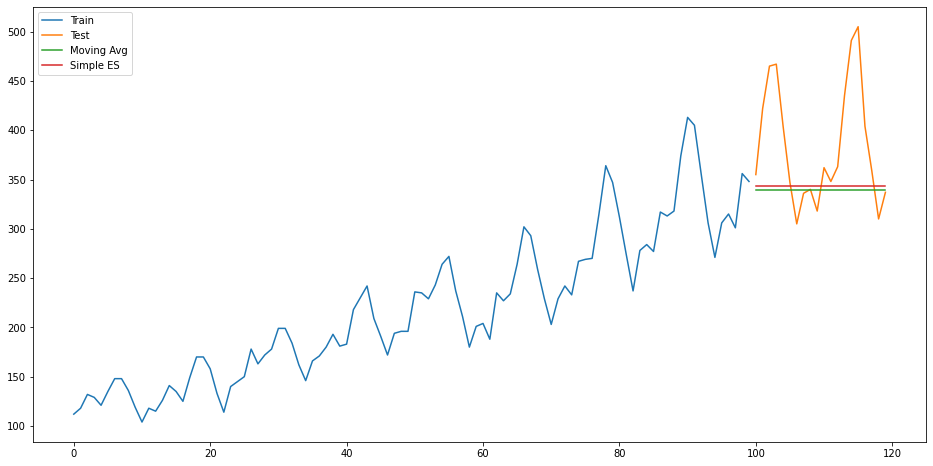

In [ ]:
# Predict using Moving Average vs. Simple Exponential Smoothing (Holt ES)
import numpy as np

#Ref: https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test
test = df[100:120]
train = df[0:100]

y_hat_avg['moving_avg_forecast'] = train['AirPassengers'].rolling(12).mean().iloc[-1]
diff = abs(y_hat_avg['moving_avg_forecast']  - test['AirPassengers'])
ma_mae = diff.mean()
print("MAE moving_avg_forecast:", ma_mae) #MAE moving_avg_forecast: 53.55

fit2 = SimpleExpSmoothing(np.asarray(train['AirPassengers'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

diff = abs(y_hat_avg['SES']  - test['AirPassengers'])
ses_mae = diff.mean()
print("MAE SES:", ses_mae) #MAE SES: 51.86

plt.figure(figsize=(16,8))
plt.plot( train['AirPassengers'], label='Train')
plt.plot(test['AirPassengers'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Avg')
plt.plot(y_hat_avg['SES'], label='Simple ES')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


MAE Holt_linear: 50.86160767242969
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  100
Model:             ExponentialSmoothing   SSE                          54525.414
Optimized:                         True   AIC                            638.125
Trend:                         Additive   BIC                            648.546
Seasonal:                          None   AICC                           639.028
Seasonal Periods:                  None   Date:                 Tue, 17 Nov 2020
Box-Cox:                          False   Time:                         23:12:04
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True

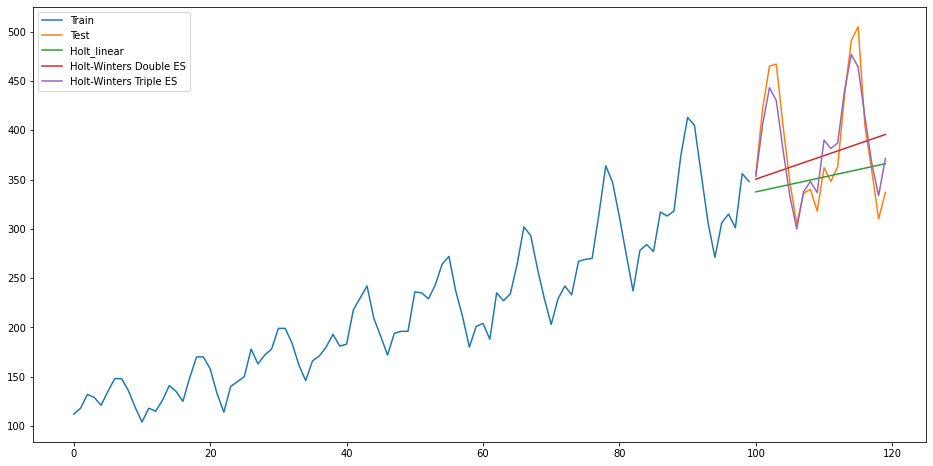

In [ ]:
# Holt Linear Smoothing vs. Holt-Winters
#https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
from statsmodels.tsa.api import Holt, ExponentialSmoothing

#Holt-Linear
fit1 = Holt(np.asarray(train['AirPassengers'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

diff = abs(y_hat_avg['Holt_linear']  - test['AirPassengers'])
holt_mae = diff.mean()
print("MAE Holt_linear:", holt_mae) #MAE Holt_linear: 50.86160767242969

#Holt-Winters - triple (trend='add', seaonsal=None)
model = ExponentialSmoothing(train["AirPassengers"], seasonal_periods=12, trend='add', seasonal=None)
fitted = model.fit()
print(fitted.summary())

forecast_trend = fitted.forecast(steps=20)
diff = abs(forecast_trend - test['AirPassengers'])
es_mae = diff.mean()
print("MAE Double ES:", es_mae)

#Holt-Winters - triple (trend='add', seaonsal='add')
#https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train["AirPassengers"], seasonal_periods=12, trend='add', seasonal='add')
fitted = model.fit()
print(fitted.summary())

forecast = fitted.forecast(steps=20)

diff = abs(forecast - test['AirPassengers'])
hw_mae = diff.mean()
print("MAE Holt-Winter mult:", hw_mae)
#MAE Holt-Winter mult: 16.328302652110207
#MAE Holt-Winter add: 18.441239762813538

plt.figure(figsize=(16,8))
plt.plot( train['AirPassengers'], label='Train')
plt.plot(test['AirPassengers'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.plot(forecast_trend, label='Holt-Winters Double ES')
plt.plot(forecast, label='Holt-Winters Triple ES')
plt.legend(loc='best')
plt.show()

## State Space Model (SSM)

SSMs model the temporal structure of the data via a latent state $l_t ∈ R^L$ that can be used to encode time series components such as level, trend, and seasonality patterns.



Known under several different names:
 - structural models (econometrics),
 - dynamic linear models (statistics),
 - Bayesian forecasting models (statistics),
 - linear system models (engineering),
 - Kalman filtering models (control engineering)

State space model (SSM) is based on a structural analysis of the problem that can be described by different components like trend, seasonality, cycle. These explanatory variable(s) are modeled separately then being put together in state space model.

"State space models provide a principled framework for modeling and learning time series patterns such as trend and seasonality. Prominent examples include ARIMA models
and exponential smoothing. SSMs are particularly well-suited for applications where the structure of the time series is well-understood, as they allow for the incorporation of structural assumptions into the model." (Rangapuram, NeurIPS 2018)

We will cover the ARIMA topic in this notebook.

See State Space notebook for other Structual models:
 - Structural Time Series Model (STSM) or Unobserved Components Model (UCM)
 - Local Linear Trend Model
 - Smooth Trend Model
- HMM
- Deep State Space

Ref:
- "Deep State Space Models for Time Series Forecasting" Amazon Research", Rangapuram, et al., NeurIPS 2018. (https://papers.nips.cc/paper/8004-deep-state-space-models-for-time-series-forecasting.pdf)
- https://towardsdatascience.com/state-space-model-and-kalman-filter-for-time-series-prediction-basic-structural-dynamic-linear-2421d7b49fa6)


### ARIMA Family
Classical Box-Jenkins methodology with ARIMA including AR, MA, ARMA, SARIMA, and SARIMAX.

- There are other variances such as VAR (Vector Auto Regression), VARMA, and VARMAX. See link: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- Other approach like: ARCH and GARCH which handle change in variance. (https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/)


### ARMA

**AR** : Auto Regression -- uses the dependent relationship between an observation and some number of lagged observations.

Linear Regression using lag values as features. The lag $n$ value is the previous $n$ value.
>- lag1 = $x_{n-1}$
>- lag2 = $x_{n-2}$

Paramer lags can be a number N or a list. For example:
>- ``lags=3 `` is using lag1, lag2, lag3.
>- ``lags=[1,3]`` is using lag1, lag3.

**MA** : Moving Average -- uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The ARMA(1, 1) model is:

> - $y_t = \phi_1 y_{t-1} + \theta_1 \varepsilon_{t-1} + \varepsilon_t$
 - $\phi_1 y_{t-1}$: AR term
 - $\theta_1 \varepsilon_{t-1}$: MA term
> - Prediction: $\hat y_t = \phi_1 y_{t-1} + \theta_1 \varepsilon_{t-1}$

**Notations:**
ARMA(p,q)  where
- p is the AR order and
- q is the MA order

Ref:
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html
- http://www.chadfulton.com/topics/arma11_cpi_inflation.html
- https://www.youtube.com/watch?v=HhvTlaN06AM&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=8 (Time Series Talk : ARMA Model by ritvikmath June 2019)


### ARIMA

ARIMA is adding "I" to ARMA where:
- **I** : Integrated -- uses the differencing of raw observations in order to make the time series stationary.

Differencing gives:
$z_t=y_{t+1} - y_t$

ARIMA: $z_t=\phi z_{t-1}+\theta \varepsilon_{t-1} + \varepsilon_t$
>reverse transform:
$y_t=\sum_{i=1}^{t-l} z_{t-i} + y_l$
where l is last time index

**Notations:**

- The ARIMA notation is ``ARIMA(p,d,q)``
where d is the order of integration, or number of differences.
- ``ARMA(p,q)`` is equivalent to ``ARIMA(p,0,q)``

> - p: The number of lag observations included in the model, also called the **lag order**.
- d: The number of times that the raw observations are differenced, also called the **degree of differencing**.
- q: The size of the moving average window, also called the **order of moving average**.

Ref:
- https://www.quora.com/How-does-the-ARMA-model-differ-from-the-ARIMA-model-In-what-situation-is-the-ARMA-model-appropriate

### Test of Stationary
ARIMA works on stationary data. So we need the intergration(I) process to ensure the data is stationary.

Stationarity if all of the following conditions are true:
- mean ($\mu$) is constant
- standard diviation ($\sigma$) is constant
- no seasonality

Check for stationarity:
- visually look at the chart
- do global vs local tests
- use Augmented Dickey-Fuller (ACF) test

Interpret ACF Result:
Using the p-value from the test:
 - p-value <= 0. 05 : stationary
 - p-value > 0. 05 : non-stationary

Make Stationary in integration process:
- use differencing: $z_t = y_t - y_{t-1}$
- may need second, third, or more differencing
- where $d$ value in ARIMA(p,d,q) is set

ACF vs PACF Test:
- ACF: Augmented Dickey-Fuller
 - MA - direct and indirect lags dependencies
- PACF: Partial Augmented Dickey-Fuller
 - AR - direct lags dependencies

Ref:
- https://machinelearningmastery.com/time-series-data-stationary-python/
- https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8


ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


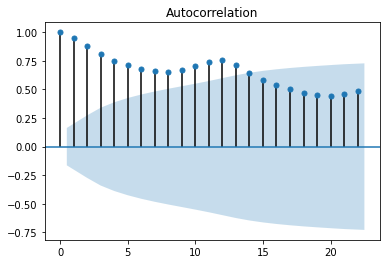

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
#data = read_csv('AirPassengers.csv', header=1, index_col=0) #load data first, don't need this

result = adfuller(data["AirPassengers"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

plot_acf(data)
plt.show()

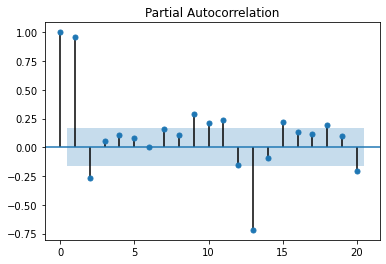

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data, lags=20)
plt.show()

### ARIMA Prediction

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1748  100  1748    0     0   8403      0 --:--:-- --:--:-- --:--:--  8363


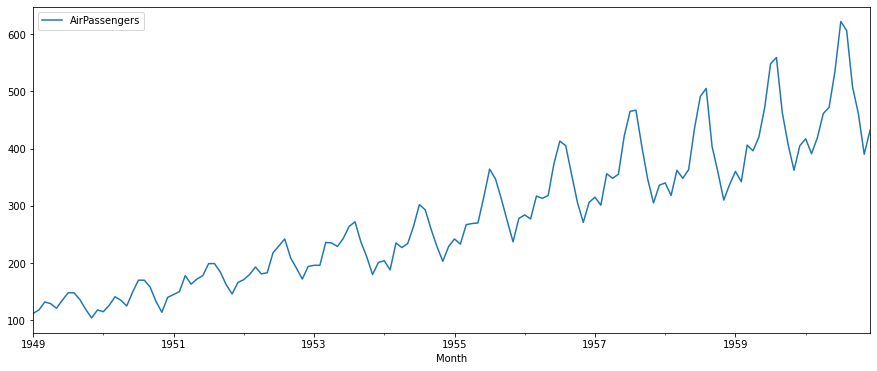

In [ ]:
# @title
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# download data file
!curl -O https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv

df = pd.read_csv('AirPassengers.csv')
#df.head(5)

data = df
data.dtypes #Month object
data['Month'] = pd.DatetimeIndex(data['Month'])
df.dtypes   #Month datetime64[ns]

data.index  #RangeIndex(start=0, stop=144, step=1)
data = data.set_index('Month')
data.index  #DatetimeIndex([...dtype='datetime64[ns]', name='Month', length=144, freq=None)

#data["1960":]
data.plot(figsize=(15, 6))
plt.show()

AIC: 923.022, HQIC: 926.185, BIC: 930.837


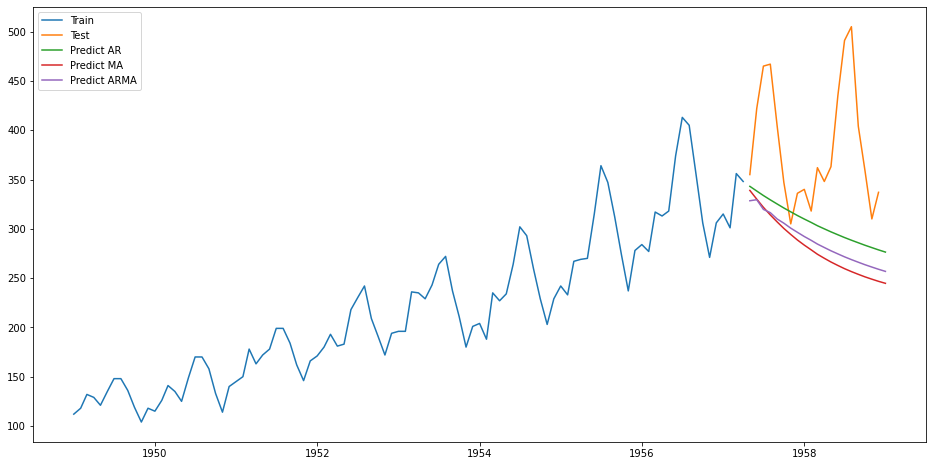

MAE AR: 77.8802038066285
MAE MA: 101.28020563340719
MAE ARMA: 93.89680858198498


In [ ]:
# ARMA model

from statsmodels.tsa.arima_model import ARMA
train = data[0:100]
test = data[100:120]

# fit model
model = ARMA(train, order=(1, 0)) # AR: p=1, q=0
model_fit = model.fit()

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
print(out.format(model_fit.aic, model_fit.hqic, model_fit.bic))
#for lags=1  AIC: 6.351, HQIC: 6.383, BIC: 6.430
#for lags=6  AIC: 6.292, HQIC: 6.380, BIC: 6.509
#for lags=12 AIC: 5.132, HQIC: 5.291, BIC: 5.526
#for lags=24 AIC: 4.714, HQIC: 5.033, BIC: 5.512

model_ma = ARMA(train, order=(2, 0)) #ma: p=0, q=2
model_ma_fit = model_ma.fit(disp=False)

model_arma = ARMA(train, order=(2, 1))
model_arma_fit = model_arma.fit(disp=False)

# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test))
yhat_ma = model_ma_fit.predict(len(train), len(train)+len(test))
yhat_arma = model_arma_fit.predict(len(train), len(train)+len(test))

plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(yhat, label='Predict AR')
plt.plot(yhat_ma, label='Predict MA')
plt.plot(yhat_arma, label='Predict ARMA')
plt.legend(loc='best')
plt.show()

MAE = abs(yhat - test['AirPassengers']).mean()
print("MAE AR:", MAE) # MAE AR: 67.07557715726492
MAE = abs(yhat_ma - test['AirPassengers']).mean()
print("MAE MA:", MAE) # MAE MA: 163.18050252340797
MAE = abs(yhat_arma - test['AirPassengers']).mean()
print("MAE ARMA:", MAE) # MAE ARMA: 88.6044333394646

#### ARIMA Parameters Search

In [ ]:
traindata = data[:-12] #data[0:100]
traindata.index
testdata = data[-12:] #data[100:120]
testdata.index

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [ ]:
# To install the library - to find hyper-parameter: p,d,q
# this is better performance then the custom grid search below, required restart -- uncomment below to use

#!pip install pmdarima

In [ ]:
# Import the library, require install and restart, uncomment to use
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(data['AirPassengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()


In [ ]:
# Manual grid search
q = d = range(0, 2)
p=range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
traindata.index = pd.DatetimeIndex(traindata.index.values,
                               freq=traindata.index.inferred_freq)
# fix the ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

In [ ]:
best_result = ""
best_aic = 9999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(traindata,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if results.aic < best_aic:
              best_aic = results.aic
              best_result = 'ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)
              print("Best so far result:", best_result)

            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print("Best result:", best_result)
#ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:803.3627295936407

Best so far result: ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1853.867132204165
Best so far result: ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1575.2927100520799
Best so far result: ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1183.7768361260032
Best so far result: ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1039.368461271076
Best so far result: ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1018.1128824449078
Best so far result: ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1008.0082399525132
Best so far result: ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:999.1896494904968
Best so far result: ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:930.7565628459181
Best so far result: ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:925.377642181272
Best so far result: ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:919.7096064601092
Best so far result: ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:860.9989449358293
Best so far result: ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:829.7168124306302
Best so far result: ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:818.5774222837308
Best so far result: AR

#### Model

In [ ]:
#https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
mod = sm.tsa.statespace.SARIMAX(traindata,
                order = (2, 1, 1),  # (0, 1, 1),
                seasonal_order =(2, 1, 0, 12))  #(2, 1, 1, 12))

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5407      1.202     -0.450      0.653      -2.896       1.815
ar.L2         -0.0062      0.371     -0.017      0.987      -0.733       0.720
ma.L1          0.2889      1.214      0.238      0.812      -2.091       2.669
ar.S.L12      -0.0850      0.089     -0.952      0.341      -0.260       0.090
ar.S.L24       0.1516      0.101      1.508      0.132      -0.045       0.349
sigma2       104.7723     14.660      7.147      0.000      76.038     133.506


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                       AirPassengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.018
Date:                             Fri, 23 Oct 2020   AIC                            904.036
Time:                                     00:14:43   BIC                            920.711
Sample:                                 01-01-1949   HQIC                           910.807
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5407      1.202     -0.450      0.653      -2.896       1.815
ar.L2         -0.0062      0.371     -0.017      0.987      -0.733       0.720
ma.L1          0.2889      1.214      0.238      0.812      -2.091       2.669
ar.S.L12      -0.0850      0.089     -0.952      0.341      -0.260       0.090
ar.S.L24       0.1516      0.101      1.508      0.132      -0.045       0.349
sigma2       104.7723     14.660      7.147      0.000      76.038     133.506
===================================================================================
Ljung-Box (Q):                       39.52   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.49   Prob(JB):                         0.81
Heteroskedasticity (H):               1.61   Skew:                            -0.09
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

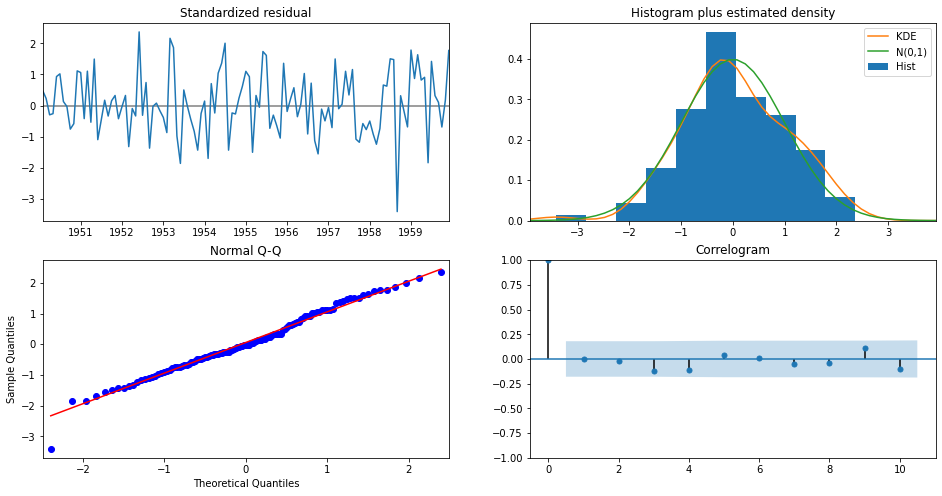

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
#pred_dynamic = results.get_prediction(start=pd.to_datetime('1960-07-01'),end=pd.to_datetime('1960-12-01'), dynamic=False, full_results=True)
pred = results.get_prediction(start=pd.to_datetime('1960-01-01'),end=pd.to_datetime('1960-12-01'), dynamic=False)
#pred = results.get_prediction(start=pd.to_datetime('1957-05-01'),end=pd.to_datetime('1958-12-01'), dynamic=False)

pred_test = pred.conf_int()
res = pred.predicted_mean
pred_test["result"] = pred.predicted_mean
pred_test["y"] = testdata
print("pred_test:\n", pred_test)

pred_test:
             lower AirPassengers  upper AirPassengers      result    y
1960-01-01           401.973665           442.097391  422.035528  417
1960-02-01           379.267100           429.378896  404.322998  391
1960-03-01           433.352729           494.611408  463.982069  419
1960-04-01           418.578914           487.914832  453.246873  461
1960-05-01           438.824559           516.019856  477.422208  472
1960-06-01           490.015762           574.033782  532.024772  535
1960-07-01           562.980045           653.457420  608.218732  622
1960-08-01           573.117980           669.548511  621.333245  606
1960-09-01           468.089006           570.163309  519.126157  508
1960-10-01           412.190332           519.593514  465.891923  461
1960-11-01           363.239984           475.729350  419.484667  390
1960-12-01           401.845668           519.196178  460.520923  432


In [ ]:
# calc performance
import numpy as np
pred_test["ae"] = abs(pred_test["y"]-pred_test["result"])
mae = pred_test["ae"].mean()
print("mae:", mae)
mse = ((pred_test["y"]-pred_test["result"])**2).mean()
rmse = np.sqrt(mse)
print("rmse:", rmse)

mae: 15.219111733354927
rmse: 19.536613678250486


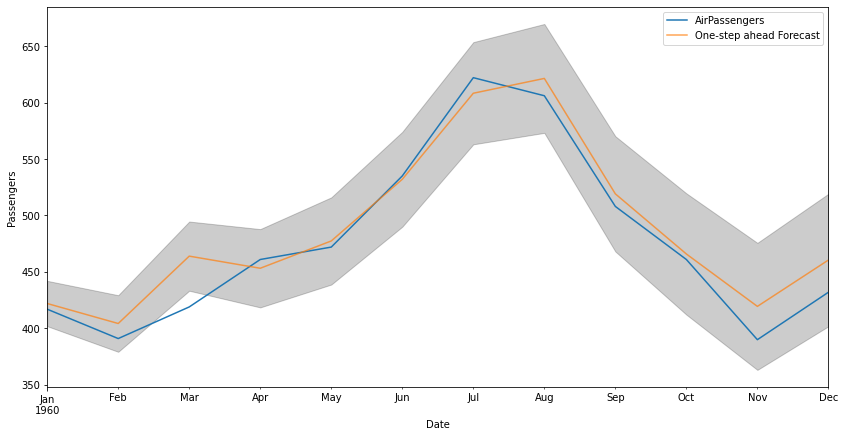

In [ ]:
pred_ci = pred.conf_int()

#print("conf_int:", pred_ci)
#print("mean:", pred.predicted_mean)
p = pred.predicted_mean

ax = testdata.plot(label='observed')
#ax = traindata.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()

plt.show()

In [ ]:
# compare to other source on the same dataset
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(pred_test["y"], pred_test["result"])  #18.38077757780352, same setup as url get: 17.1535

# compare to 17.1455 https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/
#test set: one year(12 months) for testing, training set up the last 12 months

19.536613678250486

## Conclusion

Time series fit well with structural approach such as ARIMA which give the interpretability with trend and seasonality. Triple exponential smoothing or Holt-Winters can give a pretty good performance.


